# euporie

Welcome to `euporie`, a terminal based interactive development environment for Jupyter notebooks.

- Use `Up` and `Down` to navigate, `Enter` to edit a cell, and `Esc Esc` to stop editing a cell
- Use `Ctrl+e` to execute or render a cell, or `Ctrl+r` to run a cell and select the next cell
- You can view all keyboard shortcuts in the `Help` menu
- The online documentation is available at [https://euporie.readthedocs.io](https://euporie.readthedocs.io)
---

## Markdown Cells

`euporie` will render markdown cells in notebooks, including elements such as:

Code blocks:

```python
def hello():
    print("Hello world!")
```

Tables:

| Item         | Can `euporie` display it? |
|-------------:|:--------------------------|
| **Markdown** | Yes
| **Tables**   | Yes
| **LaTeX**    | Yes

LaTex maths equations:

$$
s = ut + \frac{1}{2}at^2
$$
$$
x =\frac{-b \pm \sqrt{\frac{1}{2} a b^2}}{2a}
$$
$$
f = \sum_{i = 0}^{\infty} \frac{f^{(i)}(0)}{i!} x^i
$$

> Quote blocks

- Lists

*Inline* **styles** and `inline code`

## Cell Output

`Euporie` will also render the output of code cells.

This includes displaying Markdown, LaTeX, Images, HTML, SVG, and ANSI text:

In [1]:
display({"text/markdown": "Regular *Italic* **Bold**"}, raw=True)

Regular *Italic* **Bold**

In [2]:
display({"text/latex": r"$x =\frac{-b \pm \sqrt{\frac{1}{2} a b^2}}{2a}$"}, raw=True)

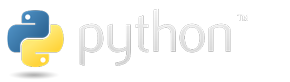

In [3]:
from IPython.display import *
import urllib.request
data = urllib.request.urlopen("https://www.python.org/static/img/python-logo.png").read()
Image(data)

This means you can use libraries like `pandas`, and display dataframes as you would expect:

In [4]:
import pandas as pd
import numpy as np

x = np.arange(20_000)

df = pd.DataFrame(
    {
        col: np.random.beta(i+1, 3, x.shape)
        for col, i in zip("abcd", [0, 2, 4, 6])
    },
    index = x,
)
df#.head()

,a,b,c,d
0,0.047565,0.559159,0.825131,0.734244
1,0.211812,0.582306,0.851747,0.736035
2,0.197174,0.342539,0.855740,0.818069
3,0.401556,0.740108,0.742639,0.800052
4,0.343826,0.344034,0.500477,0.608586
...,...,...,...,...
19995,0.353868,0.229238,0.660691,0.821696
19996,0.030828,0.625994,0.778932,0.699474
19997,0.243155,0.344380,0.489134,0.783750
19998,0.411775,0.829925,0.382035,0.413990


`euporie` can render images using Sixel graphics if your terminal supports it. Otherwise it will fall back to using character-based terminal graphics.

This means you can produce plots with `matplotlib` and `euporie` will display them in the best way it can:

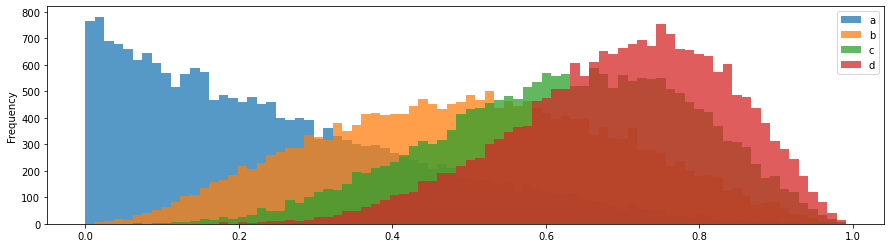

In [5]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(15, 4), facecolor="#FFF")
df.plot.hist(ax=ax, bins=80, alpha=0.75)
plt.show()

If your terminal does not support graphics, the excellent `plotext` library works very well with euporie:

In [6]:
import plotext as plt

plt.clear_figure()
plt.plot_size(100, 15)
for name, col in df.items():
    plt.hist(col.values, 80, label=name)
plt.title("Histogram Plot")
plt.show()

                                  Histogram Plot                                
     ┌─────────────────────────────────────────────────────────────────────────┐
771.0┤ ▖▖▖ a                                                                   │
     │ ▖▖▖ b                                                                   │
642.5┤ ▖▖▖ c ▖  ▄▄                                       ▄▄▟▙██                │
514.0┤ ▖▖▖ d █████                              ▗▄▄▄▄▖▟█▙████████▄▄▖           │
     │       ███████▙▟▙█▌       ▗▄   █▙█▄▟███▙▄▄████████████████████           │
385.5┤█████████████████████▄ ▄▄▄▟█████████████████████████████████████▖        │
     │█████████████████████████████████████████████████████████████████▙       │
257.0┤███████████████████████████████████████████████████████████████████▙▖    │
128.5┤████████████████████████████████████████████████████████████████████▙    │
     │██████████████████████████████████████████████████████████████████████▄▖ │
  0.0┤██████████████████████

It can also display SVG output:

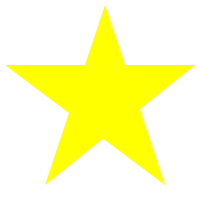

In [7]:
from IPython.display import SVG

SVG(
    '<svg width="200" height="200"><polygon points="105,5 45,185 195,65 5,65 165,185" fill="yellow" /></svg>'
)

`euoporie` can response to requests for user input from the kernel (press enter to send your input):

In [8]:
name = input("Enter your name:")
print(f"Hello {name}")

Hello Josiah


`euporie` supporst ANSI output, so  works with libraries like `tqdm` and `rich`:

In [9]:
import time
from tqdm import tqdm

for i in tqdm(range(20), ncols=100):
    time.sleep(0.2)

100%|███████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.96it/s]


In [10]:
from rich.console import Console
from rich.progress import track

console = Console(force_jupyter=False, force_terminal=True)
for _ in track(range(20), console=console):
    time.sleep(0.2)

Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00


In [11]:
!exa -l --icons --group-directories-first

drwxr-xr-x    - josiah 21 Jan 10:52  binder
drwxr-xr-x    - josiah 16 Dec  2021  build
drwxr-xr-x    - josiah 17 Dec  2021  dist
drwxr-xr-x    - josiah 17 Dec  2021  euporie_binder
drwxr-xr-x    - josiah 14 Jan 09:31  euporie_binder.egg-info
drwxr-xr-x    - josiah 16 Dec  2021  jupyter-config
drwxr-xr-x    - josiah 16 Dec  2021  node_modules
drwxr-xr-x    - josiah 16 Dec  2021  package
drwxr-xr-x    - josiah 16 Dec  2021  tests
.rw-r--r--  74k josiah 16 Feb 11:08  introduction.ipynb
.rw-r--r-- 1.1k josiah 15 Dec  2021  LICENSE
.rw-r--r-- 247k josiah 16 Dec  2021  package-lock.json
.rw-r--r--  866 josiah 16 Dec  2021  package.json
.rw-r--r--  453 josiah 16 Dec  2021  pyproject.toml
.rw-r--r--  191 josiah 17 Dec  2021  README.rst
.rw-r--r-- 1.3k josiah 17 Dec  2021  setup.cfg
.rw-r--r-- 1.4k josiah 15 Dec  2021  webpack.config.js


---

If you like `euporie`, please [star it on GitHub](https://github.com/joouha/euporie/)

⭐ https://github.com/joouha/euporie/